In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
## read the dataset
true = pd.read_csv('Dataset\True.csv', encoding = 'latin-1', on_bad_lines = 'skip')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake = pd.read_csv('Dataset\Fake.csv',encoding = 'latin-1')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
## check the duplicate values in true dataset
true[true.duplicated()]

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21227,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017"
21262,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017"
21289,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21352,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"


In [5]:
## drop all the duplicated values
true.drop_duplicates(inplace=True)

In [6]:
true[true.duplicated()]

,title,text,subject,date


In [7]:
## check the duplicate values in fake dataset
fake[fake.duplicated()]

,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA&OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [8]:
fake.drop_duplicates(inplace=True)

In [9]:
fake[fake.duplicated()]

,title,text,subject,date


In [10]:
## check the null values
true.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
true.shape

(21210, 4)

In [13]:
fake.shape

(23478, 4)

In [14]:
## firstly we have to handle imbalaced data set
min_samples = 21210
true = true.sample(min_samples, random_state=12)
fake = fake.sample(min_samples,random_state=12)

In [15]:
true.shape

(21210, 4)

In [16]:
fake.shape

(21210, 4)

In [17]:
## we have to create a depedent variable for training the model
true['target'] = 0  ## 0 refers to true news 
fake['target'] = 1 ## 1 referes to the fake news

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

### WordCloud for true dataset

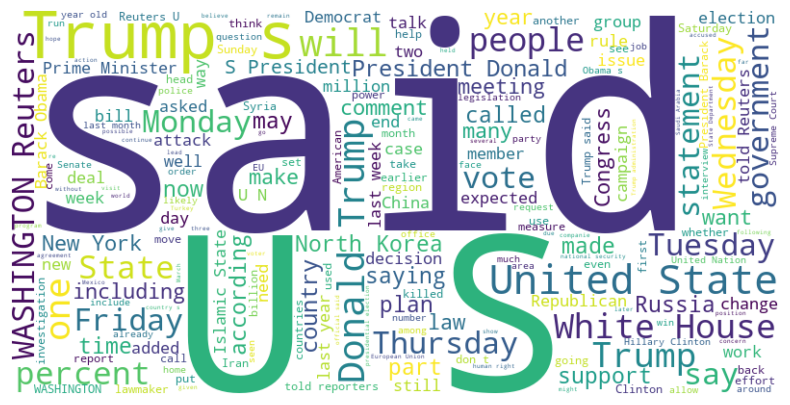

In [19]:
text = ' '.join(true['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### WordCloud for Fake dataset

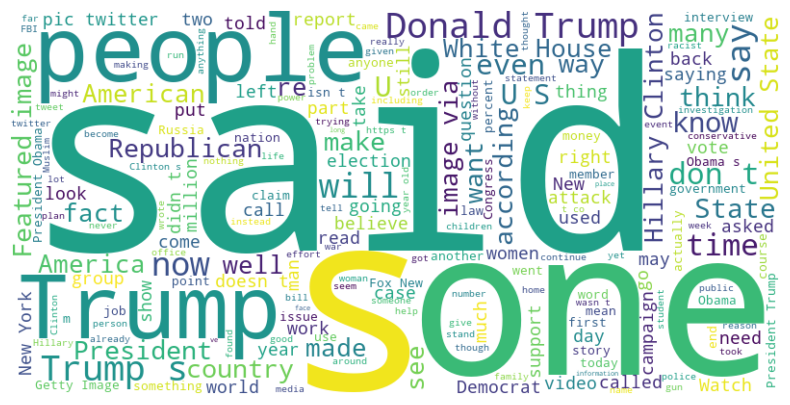

In [20]:
text = ' '.join(fake['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
true.head()

,title,text,subject,date,target
7033,White House: Castro's death will not likely sl...,WASHINGTON (Reuters) - The death of Cubas Fid...,politicsNews,"November 28, 2016",0
1524,Trump says he will not negotiate on 20 percent...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 27, 2017",0
5427,Palestinians tell Trump they are still committ...,"RAMALLAH, West Bank (Reuters) - Palestinian Pr...",politicsNews,"February 15, 2017",0
16327,Suez says temporarily moves Catalonia office t...,"PARIS (Reuters) - France s Suez, the top water...",worldnews,"October 27, 2017",0
11383,Japan considers refitting helicopter carrier f...,TOKYO (Reuters) - Japan is considering refitti...,worldnews,"December 26, 2017",0


In [21]:
fake.head()

,title,text,subject,date,target
15249,BREAKING: OBAMA REPORTEDLY RETURNING TO COLUMB...,BARACK AND MICHELLE GOOD RIDDANCE!Columbia U...,politics,"Aug 31, 2015",1
10274,NANCY PELOSI Screws Up the Oath of Office Whil...,Not a day goes by that we have another gaffe f...,politics,"Jul 30, 2017",1
18019,WATCH: TEACHER CAUGHT ON VIDEO Calling Trump T...,This unhinged high school teacher was caught t...,left-news,"Sep 4, 2017",1
14712,WATCH: HILLARY BERATE RAPE VICTIM Over Questio...,"Of course Hillary cares about rape victims, un...",politics,"Jan 3, 2016",1
16964,IN YOUR FACE : OBAMA LAUNCHES NEW #RefugeesWe...,Never mind that a new poll shows Americans opp...,Government News,"Nov 18, 2015",1


In [18]:
## now lets join the dataset 

news_data = pd.concat([true, fake], axis=0)
news_data

,title,text,subject,date,target
7033,White House: Castro's death will not likely sl...,WASHINGTON (Reuters) - The death of Cubas Fid...,politicsNews,"November 28, 2016",0
1524,Trump says he will not negotiate on 20 percent...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"September 27, 2017",0
5427,Palestinians tell Trump they are still committ...,"RAMALLAH, West Bank (Reuters) - Palestinian Pr...",politicsNews,"February 15, 2017",0
16327,Suez says temporarily moves Catalonia office t...,"PARIS (Reuters) - France s Suez, the top water...",worldnews,"October 27, 2017",0
11383,Japan considers refitting helicopter carrier f...,TOKYO (Reuters) - Japan is considering refitti...,worldnews,"December 26, 2017",0
...,...,...,...,...,...
3715,Trumps Latest Tweet Has A GLARING Mistake Th...,It was hard to imagine Donald Trump getting an...,News,"November 22, 2016",1
4500,Louisiana Cop Claims Murdering A 6-Year Old C...,A Louisiana deputy city marshal is in hot wate...,News,"September 23, 2016",1
9079,PROUD TRANSGENDER Democrat Candidate For Con...,"WQOW -A Lacrosse, WI transgender person, who r...",politics,15-Feb-18,1
17962,The Angry Left Attacks Trump for Letting 11-Ye...,President Trump just made an 11-year old boy s...,left-news,"Sep 16, 2017",1


In [19]:
## shuffle the data 
news_data = news_data.sample(frac =1).reset_index(drop=True)

In [20]:
news_data.head()

,title,text,subject,date,target
0,GOP Senator Drops BOMBSHELL  House Intel Cha...,"Former Obama national security adviser, Susan ...",News,"July 21, 2017",1
1,"Trump, Republicans set timeframe for introduci...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 16, 2017",0
2,Russian businessman Kerimov detained by French...,PARIS (Reuters) - Senior Russian lawmaker and ...,worldnews,"November 21, 2017",0
3,Trumps First Government Agency Visit: CIA,RT . President Donald Trump spoke at CIA Head...,US_News,"January 22, 2017",1
4,JUST IN: OBAMA APPOINTED JUDGE Presiding Over ...,"Now, a Clinton appointed judge who took Flynn ...",left-news,"Dec 7, 2017",1


## Text Preprocessing

In [21]:
## check the null values 
news_data.isna().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [22]:
## check the duplicated values 
news_data[news_data.duplicated()]

,title,text,subject,date,target


In [23]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  

In [24]:
nltk.download('stopwords','english')
stemmer = PorterStemmer()  

[nltk_data] Downloading package stopwords to english...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def remove_spec(x):
    text = re.sub('[^a-zA-Z]',' ',x) 
    text=text.lower() 
    text=text.split()  

    text=[stemmer.stem(word) for word in text if not word in stopwords.words('english')]
    text=' '.join(text) 
    return text

In [27]:
news_data.shape 

(42420, 5)

In [28]:
news_data = news_data.sample(1000) 

In [29]:
news_data['text_preprocessed'] = news_data['text'].apply(remove_spec) 

In [34]:
news_data['text_preprocessed']

40795    harar reuter follow text address made zimbabw ...
30994    harar reuter zimbabwean presid emmerson mnanga...
37492    donald trump tough guy syndrom make imposs res...
5430     spokesperson clinton foundat claim group retur...
20459                                                     
                               ...                        
12174    washington reuter senat judiciari committe cha...
41923    time get absolut real someth republican parti ...
2911     one ask bigger question first place need impor...
7394     mexico citi reuter guatemala attorney gener un...
30749    republican parti becom butt nearli everi singl...
Name: text_preprocessed, Length: 1000, dtype: object

In [35]:
news_data.head()

,title,text,subject,date,target,text_preprocessed
40795,Zimbabwe military's statement after seizing power,HARARE (Reuters) - Following is the text of an...,worldnews,"November 15, 2017",0,harar reuter follow text address made zimbabw ...
30994,Zimbabwe's Mnangagwa appoints former army boss...,HARARE (Reuters) - Zimbabwean President Emmers...,worldnews,"December 23, 2017",0,harar reuter zimbabwean presid emmerson mnanga...
37492,Former CIA/NSA Chief Says Trumps Unlawful Or...,Donald Trump has this tough guy syndrome that ...,News,"February 27, 2016",1,donald trump tough guy syndrom make imposs res...
5430,ONE BRUTAL IMAGE Perfectly Captures The Truth ...,A spokesperson for the Clinton Foundation clai...,politics,"Oct 16, 2017",1,spokesperson clinton foundat claim group retur...
20459,BREAKING VIDEO: ORRIN HATCH Just Told Dems To ...,,politics,"Jan 31, 2017",1,


In [55]:
a = 'dssgbchdfhkjgk'

In [56]:
df = pd.(a)

ValueError: DataFrame constructor not properly called!

## sentiment Analysis

In [34]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [35]:
news_data['sentiment'] = news_data['text_preprocessed'].apply(get_sentiment)

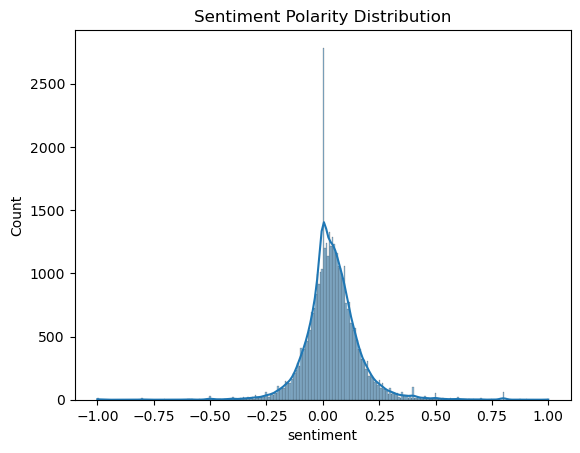

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(news_data['sentiment'], kde=True)
plt.title('Sentiment Polarity Distribution')
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(data, n=1):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(data)
    ngrams_freq = ngrams.sum(axis=0).A1
    ngrams_df = pd.DataFrame(ngrams_freq, index=vectorizer.get_feature_names_out(), columns=['frequency'])
    ngrams_df = ngrams_df.sort_values(by='frequency', ascending=False).head(20)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=ngrams_df.frequency, y=ngrams_df.index, palette='viridis')
    plt.title(f'Top {n}-grams')
    plt.show()


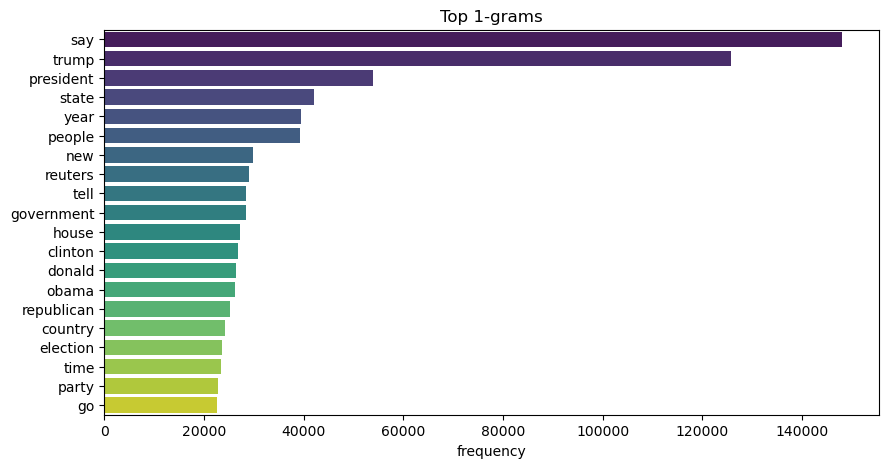

In [38]:
## Unigrams
plot_ngrams(news_data['text_preprocessed'], n=1)

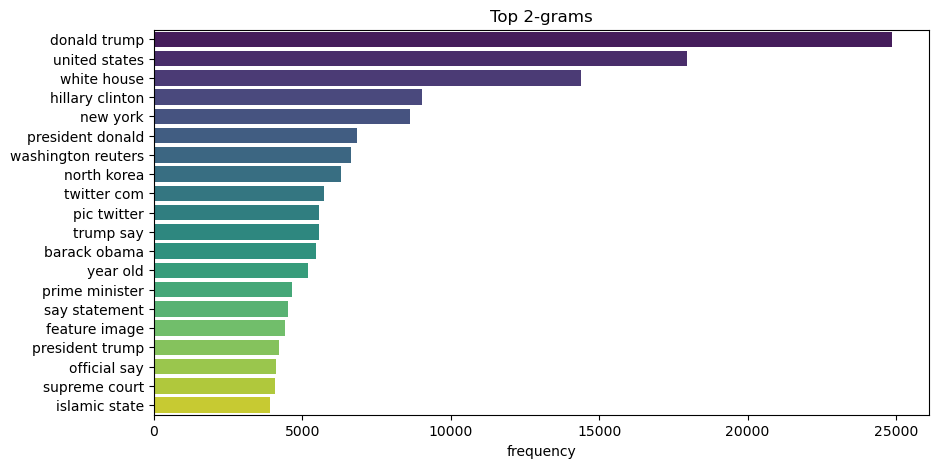

In [39]:
# Bigrams
plot_ngrams(news_data['text_preprocessed'], n=2)  

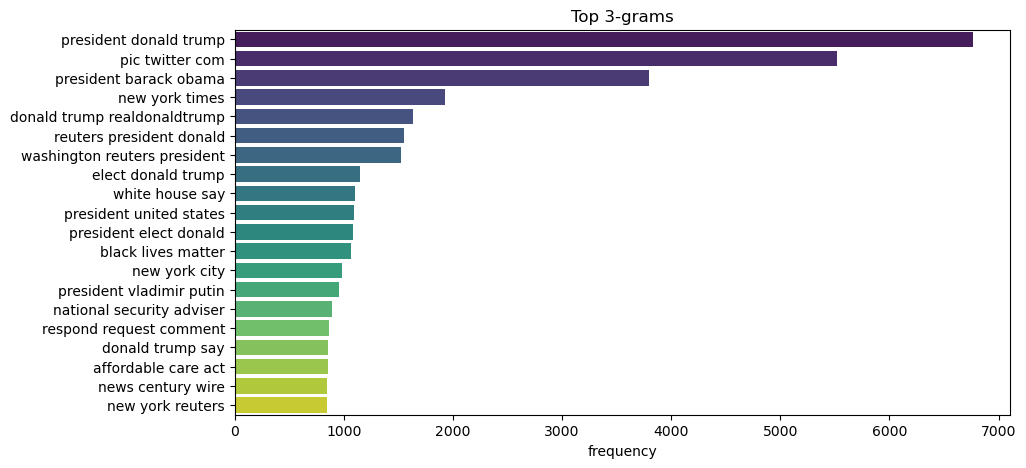

In [40]:
# Trigrams
plot_ngrams(news_data['text_preprocessed'], n=3)

In [36]:
## Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
news_data['text_preprocessed'].shape

(1000,)

In [37]:
vectorizer = TfidfVectorizer(max_features=5000)

In [38]:
X = vectorizer.fit_transform(news_data['text_preprocessed'])

In [51]:
X.shape

(1000, 5000)

In [39]:
Y = news_data[['target']]

## Model Training

In [40]:
## split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size =0.30, random_state=23)

In [41]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((700, 5000), (700, 1), (300, 5000), (300, 1))

## Training with Different Models 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [43]:
clf = LogisticRegression(max_iter = 1000)
clf.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = clf.predict(x_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6372
           1       0.99      0.98      0.99      6354

    accuracy                           0.99     12726
   macro avg       0.99      0.99      0.99     12726
weighted avg       0.99      0.99      0.99     12726



In [51]:
naive = MultinomialNB()
naive.fit(x_train,y_train)

MultinomialNB()

In [52]:
y_pred1 = naive.predict(x_test)

In [53]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6372
           1       0.93      0.93      0.93      6354

    accuracy                           0.93     12726
   macro avg       0.93      0.93      0.93     12726
weighted avg       0.93      0.93      0.93     12726



In [45]:
clf3 = RandomForestClassifier()
clf3.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred2 = clf3.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       145
           1       0.99      0.98      0.98       155

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [48]:
import pickle 
import os 

In [49]:
# save the model 
filename = os.path.join('Model','model.pkl') 
pickle.dump(clf3, open(filename, 'wb'))

In [50]:
# save the model 
vectorizer_path = os.path.join('Model','vectorizer.pkl') 
pickle.dump(vectorizer, open(vectorizer_path, 'wb'))  

In [57]:
import xgboost as xgb

In [58]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [59]:
param = {
    'max_depth': 3, 
    'eta': 0.3, 
    'objective': 'multi:softprob', 
    'num_class': 3
}

In [60]:
num_round = 20
bst = xgb.train(param, dtrain, num_round)

In [61]:
preds = bst.predict(dtest)
best_preds = [np.argmax(line) for line in preds]

In [62]:
accuracy = accuracy_score(y_test, best_preds)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.60%


## Hyperparamter Tuning

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
classifier = RandomForestClassifier()

In [65]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [66]:
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [67]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy', verbose=3)

In [68]:
random_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='auto', min_samples_split=5,
                       n_estimators=300)

In [69]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'gini',
 'bootstrap': True}

In [70]:
random_search.best_score_

0.9964975907807745

In [81]:
random_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='auto', min_samples_split=5,
                       n_estimators=300)

In [72]:
pred = best_clf.predict(x_test)

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6372
           1       1.00      1.00      1.00      6354

    accuracy                           1.00     12726
   macro avg       1.00      1.00      1.00     12726
weighted avg       1.00      1.00      1.00     12726



In [79]:
classifier = RandomForestClassifier(n_estimators=300,
                                    min_samples_split = 5,
                                    min_samples_leaf=1,
                                    max_features='auto',
                                    max_depth=30,
                                    criterion='gini',
                                    bootstrap=True)

In [82]:
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, max_features='auto', min_samples_split=5,
                       n_estimators=300)

In [83]:
import pickle
with open('classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [78]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)